# 부산시 도시철도 데이터 분석하기
---
### 작성자 : 18학번 박정현 (pwjdgus1017@donga.ac.kr)
---
현재 부산시는 부산교통공사(https://www.humetro.busan.kr/) 을 도입하여 도시철도(지하철)에 대한 정보를 제공하고 있다. 제공되는 데이터는 시간대 별로 분리된 __이산적인 데이터__이며, 각 데이터는 시간대,노선 등 구분되어 제공된다.

데이터 중에서, 하단역의 시간대별 승,하차 데이터는 부산시민이 하단역에 밀집되는 시간을 파악할 수 있다.

학습한 이산수학의 이론을 데이터에 적용하여, 우리는 대중교통 관련된 문제를 해소하기 위한 아이디어를 고찰하며 이를 실현화하기 위한 프로토타입(prototype)을 구현해본다.

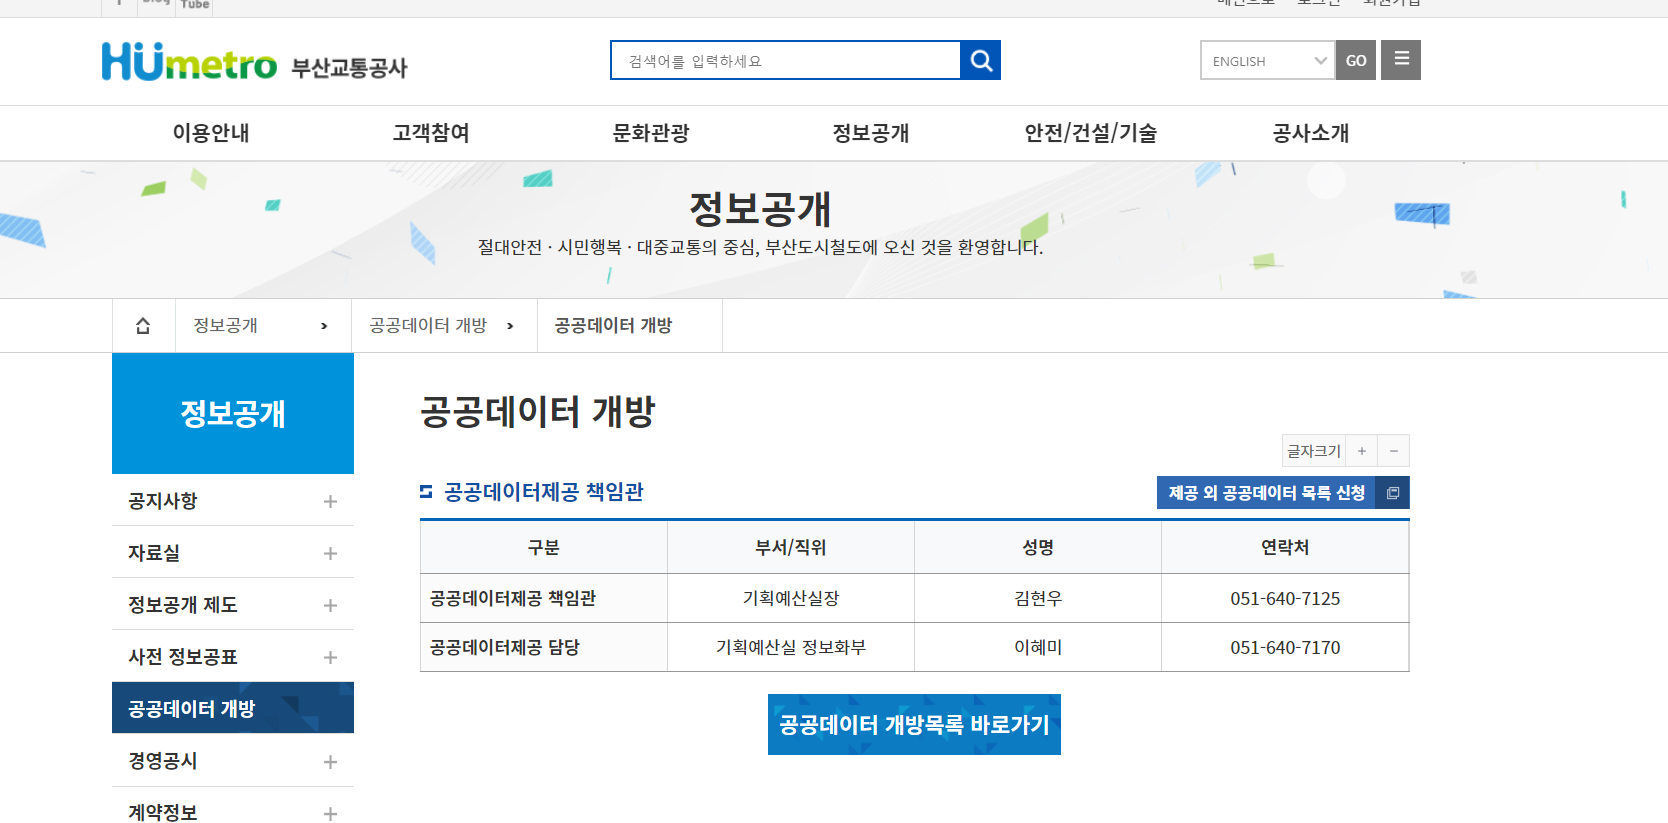


## 필수확인 사항: 
아래 링크에서 "부산교통공사_시간대별 승하차인원_20210801.csv" 파일을 다운로드 받으시기 바랍니다.
https://drive.google.com/file/d/18zfvIhNY0vemBaMyexRroewsyPzuOIkR/view?usp=sharing

파일을 올리는 방법은 다운로드한 파일을 왼쪽 탭의 폴더 아이콘을 클릭한 뒤, 파일을 해당 장소에 드래그앤 하거나 업로드 아이콘을 클릭하여 업로드 하시면 됩니다

# HW1. 판다스(pandas)의 데이터프레임(Dataframe) 다루기 

---
제출마감일: ~9.24까지 제출
제출장소: 가상대학에 HW1 제출
---

본 과제는 판다스의 데이터 프레임을 조직을 목표합니다.
csv,json 파일 읽기, 필요 데이터 추출 및 필터, 그룹화 및 통계 계산하기를 학습할 예정입니다.

```각 과제는 아래 세부 과제들로 구성됩니다,```

다음은 pandas 라이브러리를 임포트(import)합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

도시철도 승,하차 데이터를 로드하고, 데이터프레임 타입을 갖는 변수 __df__를 출력합니다.

In [2]:
#CP949는 한글로 인한 텍스트 인코딩을 위한 옵션입니다.
#파일 업로드는 런타임이 끝나면 자동으로 삭제됩니다.

df = pd.read_csv('부산교통공사_시간대별 승하차인원_20210801.csv', encoding='cp949')
df.head(5)

NameError: name 'pd' is not defined

__df.head(10)__ 명령어를 호출하여 상위 10개의 데이터를 불러옵니다.

In [ ]:
df.head(5)

## ■ 문제 1-1. 데이터 프레임의 레코드 수를 출력할 것.
데이터 프레임의 레코드 수(Row의 수)와 필드 수(Column)를 각각 출력하여라
```
데이터프레임의 __shape__ 메소드는 데이터의 차원을 표현합니다

참조: https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.shape.html`
```


In [ ]:
# 2차원 행렬로 구성된 데이터 프레임
df.shape

(44843, 29)

In [ ]:
df.shape[0] # 행

44843

In [ ]:
df.shape[1] # 열

29

## ■ 문제 1-2. 데이터프레임의 표현적인 통계(descriptive statistics) 보기
주어진 데이터프레임의 표현적인 통계를 출력하시오 

```
Descriptive statistics이란? 데이터의 분포의 모양, 퍼짐 정도, 중앙에 몰리는 정도. 최대, 최소값, 평균 을 한눈에 보여주도록 합니다.

참조 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
```


In [ ]:
df.describe()

,역번호,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
count,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44843.000000,44842.000000,44842.000000,44842.000000,44842.000000,44842.000000,44842.000000,44842.000000,44842.000000,44842.000000,44842.000000,44842.000000
mean,183.850791,6744.074170,0.204068,0.195973,0.139710,1.926343,65.680351,151.876034,334.054680,612.251678,406.741833,361.809134,383.184287,407.259818,429.329750,424.120713,443.564114,481.150083,557.591365,657.625686,338.421346,241.123188,207.128563,155.307948,71.474934,11.969671
std,66.302958,4903.797703,0.873998,1.362621,3.379857,5.250637,55.970237,105.962692,275.186657,552.867984,342.777595,279.381411,305.997525,331.191425,353.903016,350.250613,360.707113,379.702550,442.928105,598.794330,294.522960,231.074733,198.969537,160.848780,76.169278,15.077950
min,95.000000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,2.000000,6.000000,5.000000,6.000000,10.000000,11.000000,7.000000,8.000000,8.000000,6.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,118.000000,3303.000000,0.000000,0.000000,0.000000,0.000000,22.000000,79.000000,125.000000,228.000000,180.000000,174.000000,183.000000,192.000000,198.000000,192.000000,201.000000,224.000000,245.000000,235.000000,136.000000,101.000000,84.000000,58.000000,25.000000,2.000000
50%,207.000000,5262.000000,0.000000,0.000000,0.000000,0.000000,53.000000,129.000000,259.000000,470.000000,314.000000,278.000000,289.000000,301.000000,316.000000,311.000000,328.000000,362.000000,428.000000,487.000000,251.000000,175.000000,154.000000,113.000000,52.000000,6.000000
75%,230.000000,8831.000000,0.000000,0.000000,0.000000,2.000000,96.000000,195.000000,460.000000,771.000000,516.000000,473.000000,495.000000,522.000000,541.000000,536.000000,567.000000,631.000000,722.000000,868.000000,437.000000,303.000000,266.000000,199.000000,94.000000,16.000000
max,311.000000,42783.000000,62.000000,166.000000,700.000000,633.000000,420.000000,938.000000,1473.000000,4228.000000,3098.000000,2470.000000,4396.000000,5485.000000,5499.000000,5449.000000,5534.000000,3203.000000,3887.000000,5507.000000,2767.000000,2634.000000,2584.000000,2648.000000,1870.000000,178.000000


## ■ 문제 1-3. 데이터프레임의 하위 n개 출력
주어진 데이터프레임의 하위 n개의 데이터를 출력하여라

In [ ]:
#답안
df.tail(10) #하위 출력

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
44833,311,남산정,2021-03-02,하차,4235,0,0,0,0,27,49,109,393,150,166,239,184,223,213.0,317.0,335.0,391.0,574.0,339.0,183.0,138.0,118.0,73.0,14.0
44834,311,남산정,2021-03-03,승차,5636,0,0,0,2,151,222,727,895,469,413,370,352,340,307.0,223.0,279.0,290.0,274.0,128.0,83.0,52.0,37.0,21.0,1.0
44835,311,남산정,2021-03-03,하차,4409,0,0,0,0,24,60,103,334,174,145,209,228,272,236.0,322.0,383.0,450.0,582.0,322.0,174.0,164.0,112.0,86.0,29.0
44836,311,남산정,2021-03-04,승차,5345,0,0,0,1,151,235,707,818,439,405,318,332,322,322.0,240.0,281.0,243.0,242.0,119.0,72.0,52.0,31.0,14.0,1.0
44837,311,남산정,2021-03-04,하차,4233,0,0,0,0,29,45,115,361,201,130,200,189,248,211.0,287.0,380.0,423.0,585.0,279.0,172.0,144.0,123.0,88.0,23.0
44838,311,남산정,2021-03-05,승차,5435,0,0,0,1,141,227,680,852,419,357,340,336,374,289.0,255.0,217.0,293.0,280.0,145.0,96.0,57.0,38.0,37.0,1.0
44839,311,남산정,2021-03-05,하차,4178,0,0,0,0,25,47,132,302,152,133,185,160,213,229.0,263.0,383.0,423.0,586.0,330.0,178.0,176.0,126.0,110.0,25.0
44840,311,남산정,2021-03-06,승차,3760,0,0,0,2,120,142,252,356,367,355,283,302,337,244.0,205.0,195.0,228.0,144.0,69.0,68.0,49.0,28.0,13.0,1.0
44841,311,남산정,2021-03-06,하차,2846,0,0,0,1,28,31,75,112,119,105,161,218,198,233.0,254.0,264.0,232.0,258.0,134.0,114.0,119.0,89.0,71.0,30.0
44842,311,남산정,2021-03-07,승차,2732,0,0,0,1,73,88,108,195,257,232,238,266,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ■ 문제 1-4. 데이터프레임 내 특정 필트(COLUMN) 및 특정 레코드(ROW) 선택하기 (2문제)
1) 데이터프레임 내 __역번호__,__역명__ ,__구분__,__08시-09시__ 필드만 선택하고
2) 위의 데이터에서 30000-39999번째 레코드(총 1만개)만 가져와서 저장할 것

변수명은 df_sub 로 저장하시오

참고로 30000번째 데이터는 '동의대' 역명을 포함한다

```
참조: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
```

In [ ]:
# 답안 1 
df_sub = df[['역번호','역명','구분','08시-09시']]

In [ ]:
df_sub = df_sub[30000:40000]

## ■ 문제 1-5. 데이터프레임의 특정 필드에 따른 그룹화 및 평균 구하기
df_sub에서 승하차의 구분에 따른 평균을 구하여라.
df_sub에 재저장할 필요없으며, 계산된 역번호는 무시해도 된다 

```
참고: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
```

In [ ]:
#답안
df_sub.groupby(['구분'],as_index=True).mean()

,역번호,08시-09시
구분,,
승차,232.5168,401.4302
하차,232.5168,385.2460


## ■ 문제 1-6 데이터프레임의 그룹함수 적용하기(최대, 최소, 평균 등)
승하차 중 최소/최대 인원을 갖는 데이터 구하기

최소: 1동래역이 최소인원 1명이다

최대: 화 명역은 08-09시에 4228명이 하차한다.

```
DataFrame을 데이터 그룹화 시키기 함수: groupby()
- Series의 데이터 그룹화 : 특정열 인덱싱.groupby(기준열 인덱싱)
- DataFrame의 데이터 그룹화 : df.groupby("기준이 될 컬럼명")를 통해 특정열이 아닌, df의 모든 열에 대해 계산
ex) grouped = df['index'].groupby(df['key']) = df['index']를 df['key']기준으로 데이터 그룹화시키고 그 결과를 grouped에 저장 
추가적으로, grouped.mean()을 적용하여 평균을 구할 수 있다.
```

In [ ]:
df_sub.groupby(['구분'],as_index=True).min()

,역번호,역명,08시-09시
구분,,,
승차,222,2덕천,7
하차,222,2덕천,3


In [ ]:
df_sub.groupby(['구분'],as_index=True).max()

,역번호,역명,08시-09시
구분,,,
승차,243,화 명,1494
하차,243,화 명,2028


## ■ 문제 1-7 데이터프레임의 특정 값을 필터링 하기
df 데이터프레임으로부터 하단역(102)에 대한 승하차정보만 갖도록 필터링 하시오

꼭 역번호(102)로 검색하시고, df_hadan 으로 저장하면됩니다

df_hadan의 shape는 486 rows × 29 columns 입니다

```
특정 컬럼값을 만족하는 데이터프레임을 출력하기
df.loc[df['column_name'] == some_value]

```

In [ ]:
df_hadan = df.loc[df['역번호'] == 102]
df_hadan

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
3402,102,하 단,2021-01-01,승차,5351,0,0,0,14,44,129,156,226,258,251,292,356,449,403.0,459.0,489.0,479.0,336.0,292.0,284.0,268.0,124.0,36.0,6.0
3403,102,하 단,2021-01-01,하차,5079,0,0,0,2,20,147,166,236,230,241,297,315,332,376.0,429.0,438.0,469.0,402.0,251.0,231.0,252.0,140.0,82.0,23.0
3404,102,하 단,2021-01-02,승차,8208,0,0,0,12,70,128,249,356,405,530,547,715,765,727.0,638.0,724.0,679.0,486.0,322.0,366.0,289.0,135.0,55.0,10.0
3405,102,하 단,2021-01-02,하차,7678,0,0,0,1,29,241,298,413,434,482,522,561,599,602.0,566.0,550.0,632.0,585.0,275.0,275.0,341.0,155.0,87.0,30.0
3406,102,하 단,2021-01-03,승차,5683,0,0,0,19,51,82,143,214,259,306,326,390,459,500.0,499.0,532.0,510.0,394.0,272.0,300.0,297.0,102.0,23.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,102,하 단,2021-08-29,하차,7949,0,6,0,0,41,232,242,326,420,426,480,520,508,552.0,628.0,691.0,604.0,615.0,452.0,417.0,422.0,215.0,122.0,30.0
3884,102,하 단,2021-08-30,승차,16281,0,0,0,21,138,472,1299,1552,913,869,896,841,870,896.0,913.0,1059.0,1508.0,1647.0,904.0,733.0,506.0,207.0,36.0,1.0
3885,102,하 단,2021-08-30,하차,14578,0,0,0,0,62,811,1278,1231,799,743,687,738,840,847.0,874.0,1024.0,1161.0,1479.0,768.0,437.0,374.0,256.0,140.0,29.0
3886,102,하 단,2021-08-31,승차,16087,0,12,10,33,122,428,1312,1592,947,851,759,858,839,811.0,840.0,1063.0,1506.0,1653.0,920.0,688.0,538.0,237.0,65.0,3.0


## ■ 문제 1-8 실제 데이터값에 기반한 서브데이터 추출(Boolean indexing)
두 가지 이상의 필터를 혼합하여 8-9시와 18시-19시에 각각 1000명이상, 2000이상 데이터만 추출하시오. 

참고로 __승차__한 데이터만 29건이 발생합니다.

```
cond_A = (df['column_name'] > 1000)
cond_B = (df['column_name'] > 2000)
df_hadan_sub1 = df_hadan.loc [cond_A & cond_B]
```

In [ ]:
cond_A = (df_hadan['08시-09시'] > 1000)
cond_B = (df_hadan['18시-19시'] > 2000)
df_hadan_sub1 = df_hadan.loc[ (cond_A & cond_B) ]
df_hadan_sub1.shape

(29, 29)

# 논리식에 대한 프로그램 사용 및 Matplotlib 시각화 결과의 시각화

---

```pyProver``` 라이브러리 사용하는 방법


In [ ]:
!pip install pyprover

In [ ]:
from pyprover import *

## Matplotlib 사용하기

---
Matplotlib 한글 깨짐 해결법



[참고 사이트] : https://teddylee777.github.io/colab/colab-korean 



In [ ]:
#matplotlib 불러오기.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## ■ 문제 2-1 ...

In [ ]:
# constructive propositional logic  좋은쪽 논리
assert (E, E>>F, F>>G), "proves G" 
assert G
assert (E>>F, F>>G),"proves E>>G"
assert E>>G

# classical propositional logic 가능성은 무한하다?
assert ~~E, "proves E" 
assert top , "proves (E>>F)|(F>>E)" 

# constructive predicate logic
assert (R(j)) , "proves TE(x, R(x))" 
#assert (TE(x, R(x))), "proves"
assert (FA(x, R(x) >> S(x)), TE(y, R(y))), "proves TE(z, S(z))" 
#assert (TE(z, S(z))),"proves"

# classical predicate logic
assert ~FA(x, R(x)), "proves TE(y, ~R(y))"
#assert TE(y, ~R(y)), "proves"
assert top , "proves TE(x, D(x)) | FA(x, ~D(x))" 
#assert TE(x, D(x)) | FA(x, ~D(x)), "proves"

# use of expr parser
assert expr(r"A x. E y. F(x) \/ G(y)") == FA(x, TE(y, F(x) | G(y)))
assert expr(r"a = b /\ b = c") == Eq(a, b) & Eq(b, c)

<ipython-input-33-dec6fec4aa07>:2: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (E, E>>F, F>>G), "proves G"
<ipython-input-33-dec6fec4aa07>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (E>>F, F>>G),"proves E>>G"
<ipython-input-33-dec6fec4aa07>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (FA(x, R(x) >> S(x)), TE(y, R(y))), "proves TE(z, S(z))"


## ■ 문제 2-2 ...

In [ ]:
#답안

## ■ 문제 2-3 승,하차 인원에 대한 직선 그래프 출력
__문제1-6 참고__

In [ ]:
#답안 1
get_on = list()
off = list()

for i in range(0,row): # 앞서 구한 row 값.
    if (df.iloc[i]['구분'] == "승차" ): # 승차에 대한 값
        get_on.append(df.iloc[i]['합계'])
        #print(df.iloc[i]['합계']) 

#print("===============승차================")
for i in range(0,row):
    if (df.iloc[i]['구분'] == "하차" ): # 하차에 대한 값
        off.append(df.iloc[i]['합계'])
        #print(df.iloc[i]['합계']) 
#print("===============하차================")


get_on.sort()
off.sort()



NameError: ignored

In [ ]:
#답안2
# 승차, 하차
plt.plot(get_on,off,'r') # 'r' = red color

plt.title("승하차")
plt.xlabel("승차")
plt.ylabel("하차")
plt.show()
plt.close()


## ■ 문제 2-5 특정 조건에 따른 승,하차 그래프 만들기

예) 승하차 인원 15000명 이상이 넘는 승하차 값으로 그래프 만들기

#### 조건
- min값은 두 리스트의 최소값의 백의 자리 ~ 일의 자리 0으로 만들 것.
- max값은 두 리스트의 최대값보다 조금 크게 할 것.
- 만약 두 리스트의 길이가 다르다면 별도의 처리를 할 것.
- 눈금의 범위는 min ~ max로 지정하고 간격은 적당하게 할 것.

In [ ]:
#답안1
getonmore = list()
offmore = list()

for i in range(0,row): # 앞서 구한 row 값.
    if (df.iloc[i]['구분'] == "승차"and df.iloc[i]['합계'] >= 18000): # 승차에 대한 값
        getonmore.append(df.iloc[i]['합계'])
        #print(df.iloc[i]['합계']) 

#print("===============승차================")
for i in range(0,row):
    if (df.iloc[i]['구분'] == "하차"and df.iloc[i]['합계'] >= 18000): # 하차에 대한 값
        offmore.append(df.iloc[i]['합계'])
        #print(df.iloc[i]['합계']) 
#print("===============하차================")
getonmore.sort()
offmore.sort()

min = 0
max = 0

if getonmore[0] > offmore[0]:
    min = offmore[0]
else:
    min = getonmore[0]
min = (min//1000)*1000

if getonmore[-1] > offmore[-1]:
    max = getonmore[-1]
else:
    max = offmore[-1]

max = max + 100


In [ ]:
#답안2
geton_len = len(getonmore)
off_len = len(offmore)

if geton_len == off_len: #배열의 길이가 같아야 그래프 형성 가능
    plt.figure(figsize=(25,10)) #그래프 창 사이즈
    plt.plot(getonmore,offmore,'g',marker="*", label = "Get on and Off") # 'r' = red color
    plt.title("Get on and off.")
    plt.xlabel("Get on")
    plt.ylabel("Off")
    plt.xticks(np.arange(min,max,50)) # 눈금 최소 , 눈금 최대, 눈금 증가폭
    plt.yticks(np.arange(min,max,50))
    plt.legend() 
    plt.show()
    plt.close()

else: # 길이가 같지 않을 때
    if geton_len > off_len: # 승차가 더 길면
        sub = geton_len - off_len # 승차 - 하차 = 길이 차이.
        for i in range(0,sub):
            getonmore.pop()
        plt.figure(figsize=(25,10))
        plt.plot(getonmore,offmore, 'g',marker="*",label = "Get on and Off")
        plt.title("Get on and Off")
        plt.xlabel("Get on")
        plt.ylabel("Off")
        plt.xticks(np.arange(min,max,50))
        plt.yticks(np.arange(min,max,50))
        plt.legend()
        plt.show()
        plt.close()

    elif geton_len < off_len:# 하차가 더 길면
        sub = off_len - geton_len
        for i in range(0,sub):
            offmore.pop()
        plt.figure(figsize=(25,10))
        plt.plot(getonmore,offmore, 'g',marker="*",label = "Get on and Off") 
        plt.title("Get on and Off")
        plt.xlabel("Get on")
        plt.ylabel("Off")
        plt.xticks(np.arange(min,max,50))
        plt.yticks(np.arange(min,max,50))
        plt.legend()
        plt.show()
        plt.close()

## ■ 문제 2-6 날짜별 승,하차 시각화 하기

승차인원 시각화 그래프

In [ ]:
#답안 1
#각 날짜 데이터 리스트

day = list()
for i in range(0, row):
    if i % 2 != 0:  # 승하차 날짜 중복 방지.홀수 인덱스 또는 짝수 인덱스 건너뛰기
        day.append(df.iloc[i]["년월일"])
day.sort()

In [ ]:
#답안 2
x = np.arange(len(day))

get_value = get_on # 승차 인원 리스트
colors = ['y','C2'] 
plt.figure(figsize=(40,10))
plt.bar(x,get_value,color=colors,width = 0.5)
plt.xticks(x,day)
plt.show()
plt.close()

하차인원 시각화 그래프



In [ ]:
#답안 3
x = np.arange(len(day))

off_value = off #하차 인원
colors = ['y','C2']
plt.figure(figsize=(40,10))
plt.bar(x,off_value,color=colors,width = 0.5)
plt.xticks(x,day)
plt.show()
plt.close()

## ■ 문제 2-7 두 그래프(문제 2-6 산출물) 합치기


In [ ]:
#답안 1
k = np.arange(len(day))

plt.figure(figsize=(40,20))


plt.bar(k, get_value,color='r',width = 0.2, label = "승차")
plt.bar(k+0.2 ,off_value,color='g',width = 0.2, label = "하차")
plt.xticks(k,day)

plt.legend(loc = 'upper left',fontsize =15)
plt.xlabel("년월일")
plt.ylabel("승하차 인원")
plt.title("날짜별 승하차 인원")
plt.show()
plt.savefig("ti.png")
plt.close()

# 데이터 집합(Set)연산 적용하기(교집하,차집합,합집합 등). 구글 드라이브와 연동하기, 구글드라이드로 데이터 읽기 밎 저장하기.

구글 드라이브 연동 방법

[참고 사이트] : ttps://leti-lee.tistory.com/3

In [ ]:
from google.colab import drive 
from google.colab import files
drive.mount('/content/gdrive/')

경로 쉽게 알아내기



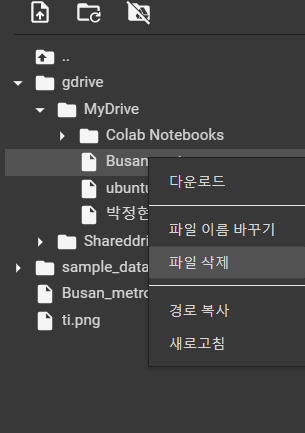

## ■ 문제 3-1 구글 드라이브에서 기존의 csv 파일 불러오기 및 상위 10개 출력

In [ ]:
#답안
df = pd.read_csv('/content/gdrive/MyDrive/Busan_metro.csv', encoding='cp949') # 런타임 풀려도 다시 업로드 할 필요 없음
df.head(10)

구글 드라이브에 파일 업로드 하는 방법



In [ ]:
#files.upload()

##■  문제 3-2 문제 1-6을 활용하여 데이터 프레임을 만들기.

In [ ]:
df3 = pd.DataFrame(subset_df) #subset_df = 문제 1-6.에서 만들어짐
df3

##■  문제 3-3 만들어진 데이터 프레임을 구글 드라이브에 업로드 하기.

In [ ]:
#힌트
df3.to_csv("New_Busan_metro.csv") # 이경우 파일은 코랩에 바로 저장됨.
#files.download('New_Busan_metro.csv') 코랩의 파일을 내 컴에 저장.
!ls
!cat New_Busan_metro.csv #테스트

In [ ]:
#답안
df3.to_csv('/content/gdrive/MyDrive/New_Busan_metro.csv')
!ls /content/gdrive/MyDrive/ # ls => 리눅스 명령어 파일 목록을 보여줌
!cat /content/gdrive/MyDrive/New_Busan_metro.csv  # cat => 리눅스 명령어 파일 미리보기
#!mkdir /content/gdrive/MyDrive/Newfolder => mkdir 폴더 지우는 명령어
#!rm -r /content/gdrive/MyDrive/Newfolder => rm 파일 삭제 명령어 -r => 폴더 지우는 옵션

##■  문제 3-4 Set을 이용해 교집합 구하기

적당한 Record를 활용해서 교집합을

In [ ]:
#Record 추출 (구분,10시-11시)
#짝수 행 = 하차
#홀수 행 = 승차
a_record = list() #승
b_record = list() #하
for i in range(0,row):
    if i % 2 !=0: #홀수
        a_record.append(df.iloc[i]["10시-11시"])
    else:
        b_record.append(df.iloc[i]["10시-11시"])

A = set(a_record)
B = set(b_record)

In [ ]:
#답안
E = A.intersection(B) # A집합 B집합
print("교집합 : ",E)

##■  문제 3-5 Set을 이용해 합집합 구하기

In [ ]:
#답안
S = A.union(B)
print(S)

##■  문제 3-6 Set을 이용해 A-B, B-A 차집합 및 대칭 **차집합** 구하기

---



In [ ]:
Fa = A.difference(B) # A-B
Fb = B.difference(A) # B-A
sdiff = A.symmetric_difference(B)
print("A-B : ", Fa)
print("B-A : ", Fb)
print("(A-B)∪(B-A) : ", sdiff)

##■  문제 3-7  matplotlib을 이용해 벤다이어그램 시각화 하기.

In [ ]:
#벤 다이어그램 그리기전 라이브러리 불러오기.
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
import matplotlib.pyplot as plt

In [ ]:
#답안
plt.figure()

E_size = len(E) #교집합 크기
Fa_size = len(Fa) # A-B
Fb_size = len(Fb) # B-A

venn2(subsets = (Fa_size,Fb_size,E_size), set_labels=("a_record","b_record"),alpha=0.8)
plt.show()
plt.close()

#벤 다이어그램에 적히는 숫자의 의미는 그 원소의 갯수이다.

# 그래프 생성하기(노드 및 엣지 추가), 노드/엣지 속성 넣기

---

#방향성 그래프 생성하기, 그래프 분석 및 시각화 하기
---

#그래프 알고리즘 적용하게(그래프 컬러링, 최단거리, 중심노드 찾기)
---

#합성함수 만들기 및 적용
---

트리 순회 출력해주는 함수?



#순열 및 조합사용하여 신규 데이터 생성
---

#확률 계산, 확률 분포(푸아소,노멀,powerlaw), 기대값 분산
---